# **Actividad 5.1 ANOVA y MANOVA**

Ivanna Maldonado Cervantes 

Paula Simonetta Madrid Pérez

Ania Diaz Gonzalez 

Miranda Eugenia Colorado Arróniz

Omar Alejandro Quinn


In [ ]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.multivariate.manova import MANOVA

In [6]:
pd.set_option('display.max_rows', None)        # Muestra todas las filas
pd.set_option('display.max_columns', None)     # Muestra todas las columnas
pd.set_option('display.width', None)           # Evita saltos de línea automáticos
pd.set_option('display.max_colwidth', None)

In [7]:
df = pd.read_csv('01_DiatomInventories_GTstudentproject_B.csv')

print("\nPrimeras filas del dataframe:")
df.head()


Primeras filas del dataframe:


,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,Achnanthes aapajaervensis,Achaa01,S04094200_20120910,S04094200,2012-09-10,8,420,19.047619
1,Achnanthes aapajaervensis,Achaa01,S05155300_20100728,S05155300,2010-07-28,1,404,2.475248
2,Achnanthes affinis,Achaf01,S02018780_20070808,S02018780,2007-08-08,1,400,2.500000
3,Achnanthes affinis,Achaf01,S02022675_20090803,S02022675,2009-08-03,2,400,5.000000
4,Achnanthes affinis,Achaf01,S02094920_20120726,S02094920,2012-07-26,1,400,2.500000


In [8]:
# Lista de columnas categóricas
categoricas = [
    'TaxonName',
    'TaxonCode',
    'SamplingOperations_code',
    'CodeSite_SamplingOperations',
    'Date_SamplingOperation'
]

# Crear una copia del df original para no modificarlo directamente
df_filtrado = df.copy()

# Para cada columna, conservar solo las filas con los 15 valores más frecuentes de esa columna
for col in categoricas:
    top15 = df_filtrado[col].value_counts().head(15).index
    df_filtrado = df_filtrado[df_filtrado[col].isin(top15)]

# Mostrar el resultado
print("\nDataFrame filtrado con los valores más frecuentes de cada columna:")
print(df_filtrado.shape)
df_filtrado.head(15)



DataFrame filtrado con los valores más frecuentes de cada columna:
(225, 8)


,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
32813,Achnanthes lanceolata,Achla02,S02036250_20080807,S02036250,2008-08-07,5,400,12.500000
32819,Achnanthes lanceolata,Achla02,S02036250_20190807,S02036250,2019-08-07,2,420,4.761905
33567,Achnanthes lanceolata,Achla02,S02067800_20100728,S02067800,2010-07-28,20,400,50.000000
35575,Achnanthes lanceolata,Achla02,S03055490_20130711,S03055490,2013-07-11,1,403,2.481390
37130,Achnanthes lanceolata,Achla02,S03150000_20120719,S03150000,2012-07-19,4,418,9.569378
37155,Achnanthes lanceolata,Achla02,S03151800_20120719,S03151800,2012-07-19,8,408,19.607843
38629,Achnanthes lanceolata,Achla02,S03233896_20140730,S03233896,2014-07-30,1,407,2.457002
38905,Achnanthes lanceolata,Achla02,S03250952_20130807,S03250952,2013-08-07,4,417,9.592326
39206,Achnanthes lanceolata,Achla02,S03266920_20170906,S03266920,2017-09-06,13,401,32.418953
43331,Achnanthes lanceolata,Achla02,S04117800_20210813,S04117800,2021-08-13,2,407,4.914005


In [9]:
#Identificar valores nulos por columna
valores_nulos=df_filtrado.isnull().sum()
valores_nulos

TaxonName                           0
TaxonCode                           0
SamplingOperations_code             0
CodeSite_SamplingOperations         0
Date_SamplingOperation              0
Abundance_nbcell                    0
TotalAbundance_SamplingOperation    0
Abundance_pm                        0
dtype: int64

In [10]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, 32813 to 1636592
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TaxonName                         225 non-null    object 
 1   TaxonCode                         225 non-null    object 
 2   SamplingOperations_code           225 non-null    object 
 3   CodeSite_SamplingOperations       225 non-null    object 
 4   Date_SamplingOperation            225 non-null    object 
 5   Abundance_nbcell                  225 non-null    int64  
 6   TotalAbundance_SamplingOperation  225 non-null    int64  
 7   Abundance_pm                      225 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 15.8+ KB


## **Variable 1: Abundace_nb Cell**

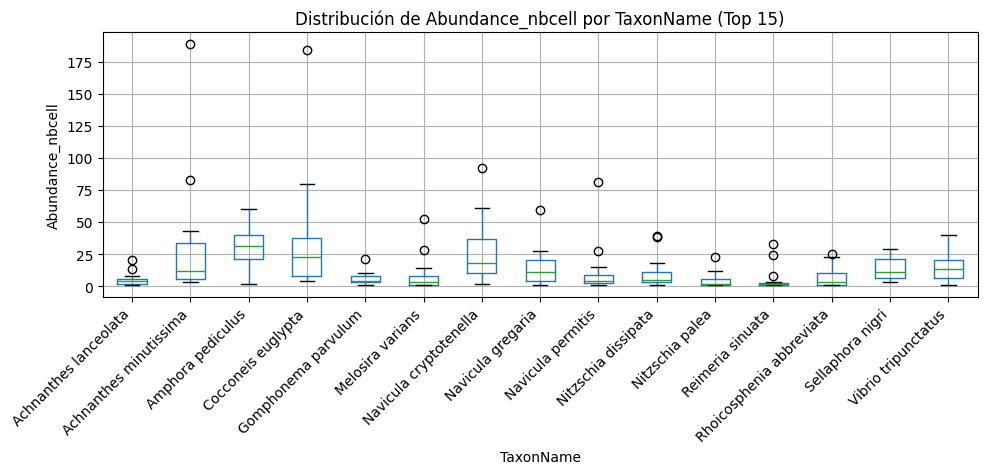

In [11]:
df_filtrado.boxplot("Abundance_nbcell", by="TaxonName", figsize=(10,5))
plt.xticks(rotation=45, ha='right')   
plt.title("Distribución de Abundance_nbcell por TaxonName (Top 15)")
plt.suptitle("") 
plt.xlabel("TaxonName")
plt.ylabel("Abundance_nbcell")
plt.tight_layout()
plt.show()

/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_33633/742780244.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df_filtrado, x="TaxonName", y="Abundance_nbcell", ci=95)


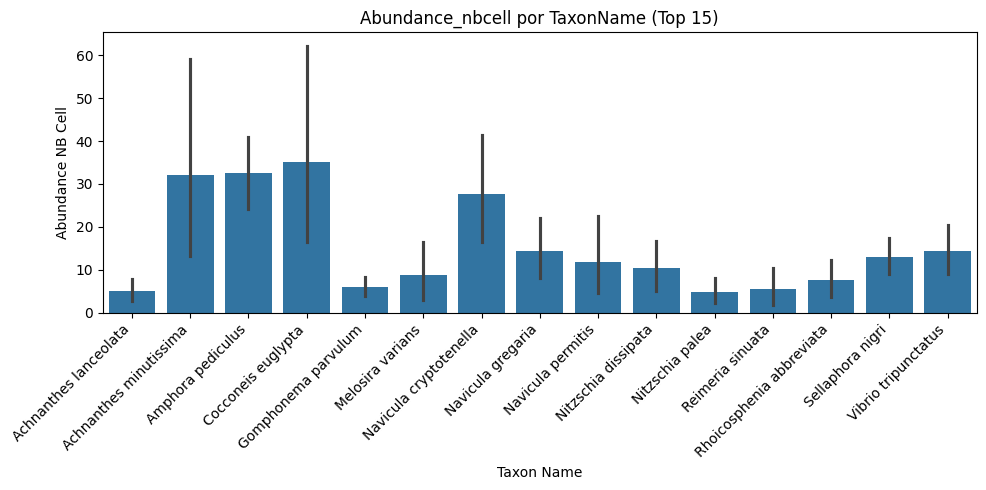

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_filtrado, x="TaxonName", y="Abundance_nbcell", ci=95)
plt.title("Abundance_nbcell por TaxonName (Top 15)")
plt.xticks(rotation=45, ha='right')   
plt.ylabel("Abundance NB Cell")
plt.xlabel("Taxon Name")
plt.tight_layout()                 
plt.show()

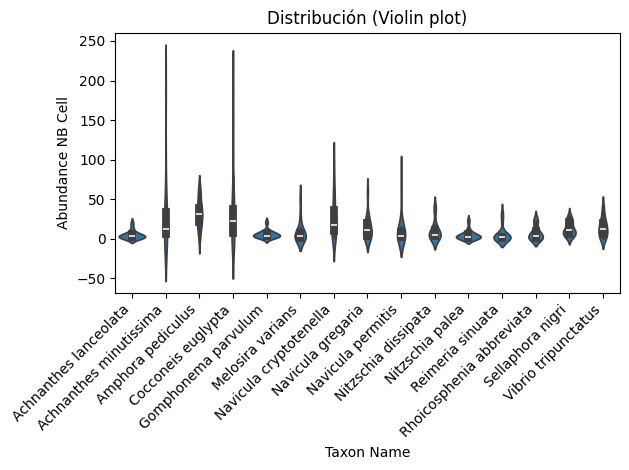

In [13]:
sns.violinplot(x='TaxonName', y='Abundance_nbcell', inner='box', data=df_filtrado)
plt.title("Distribución (Violin plot)")
plt.ylabel("Abundance NB Cell")
plt.xlabel("Taxon Name")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **STATESMODELS (ANOVA)**

In [14]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
mod= ols('Abundance_nbcell ~ TaxonName', data=df_filtrado).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)

              df        sum_sq      mean_sq         F    PR(>F)
TaxonName   14.0  24967.955556  1783.425397  3.854576  0.000008
Residual   210.0  97162.266667   462.677460       NaN       NaN


La variable independiente TaxonName tiene un efecto significativo sobre la variable dependiente Abundance_nbcell.


Esto se observa porque el valor p (PR(>F)) es muy bajo (0.000008), mucho menor que 0.05.
Esto indica que existen diferencias estadísticamente significativas en la abundancia celular entre los distintos taxones analizados.


En resumen, la abundancia celular varía de manera importante según el taxón.

### **MANOVA** (Anova multifactorial)

ANOVA multifactorial con CodeSite_SamplingOperations y Date_SamplingOperation como variables independientes, y Abundance_nbcell como variable dependiente

In [28]:
mod = ols('Abundance_nbcell ~ CodeSite_SamplingOperations + Date_SamplingOperation', data=df_filtrado).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

                                df         sum_sq     mean_sq         F  \
CodeSite_SamplingOperations   13.0    3329.922222  256.147863  0.452908   
Date_SamplingOperation        13.0    1686.349285  129.719176  0.229363   
Residual                     210.0  118768.266667  565.563175       NaN   

                               PR(>F)  
CodeSite_SamplingOperations  0.947682  
Date_SamplingOperation       0.997795  
Residual                          NaN  


Los resultados muestran que ni CodeSite_SamplingOperations ni Date_SamplingOperation tienen un efecto significativo sobre Abundance_nbcell.
Esto se debe a que los valores p (PR(>F)) para ambas variables independientes son muy altos (0.95 y 0.99), mucho mayores que 0.05.


Esto indica que las diferencias en Abundance_nbcell entre los distintos sitios y fechas no son estadísticamente significativas en tu muestra.


En resumen, según este análisis, la abundancia celular no varía de manera importante según el sitio de muestreo ni la fecha.

## **Variable 2: TotalAbundance_SamplingOperation**

In [16]:
df_filtrado['TotalAbundance_SamplingOperation']

32813      400
32819      420
33567      400
35575      403
37130      418
37155      408
38629      407
38905      417
39206      401
43331      407
49601      397
50522      401
51715      404
52652      403
55156      402
69365      400
69370      420
70162      400
73269      403
75843      418
75870      408
78052      407
78395      417
78713      401
83677      407
91157      397
92739      401
94717      404
96601      403
102266     402
223014     400
223023     420
223690     400
227022     403
229727     418
229755     408
232021     407
232361     417
232700     401
236864     407
243766     397
244881     401
246270     404
247965     403
252619     402
293466     400
293471     420
294152     400
297096     403
299508     418
299533     408
301601     407
301943     417
302285     401
306848     407
313499     397
314813     401
316231     404
317807     403
322680     402
646956     400
646960     420
647654     400
649779     403
651488     418
651504     408
653036    

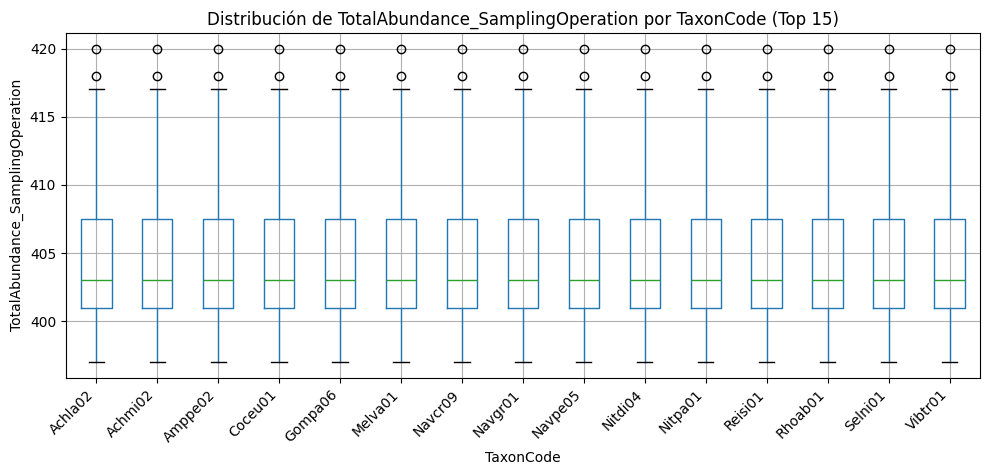

In [17]:
df_filtrado.boxplot("TotalAbundance_SamplingOperation", by="TaxonCode", figsize=(10,5))
plt.xticks(rotation=45, ha='right')   
plt.title("Distribución de TotalAbundance_SamplingOperation por TaxonCode (Top 15)")
plt.suptitle("") 
plt.xlabel("TaxonCode")
plt.ylabel("TotalAbundance_SamplingOperation")
plt.tight_layout()
plt.show()

/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_33633/64386738.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df_filtrado, x="TaxonCode", y="TotalAbundance_SamplingOperation", ci=95)


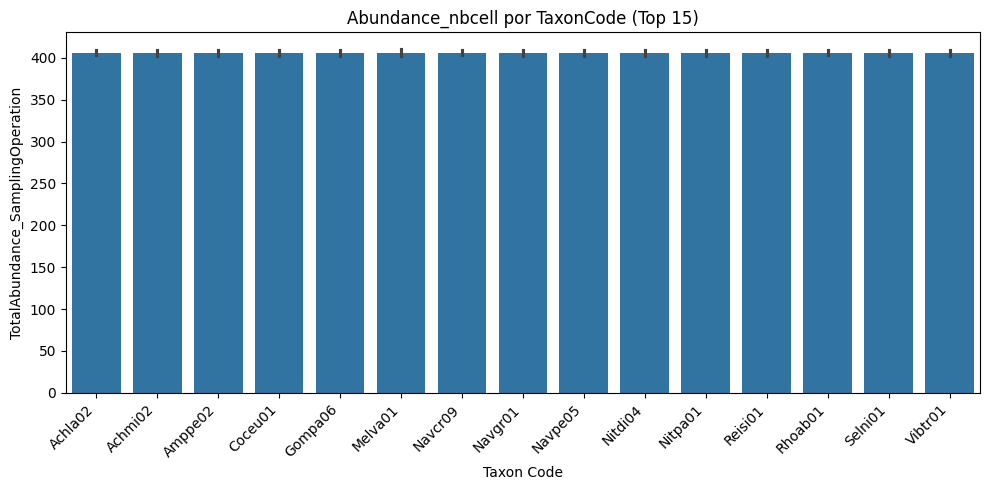

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_filtrado, x="TaxonCode", y="TotalAbundance_SamplingOperation", ci=95)
plt.title("Abundance_nbcell por TaxonCode (Top 15)")
plt.xticks(rotation=45, ha='right')   
plt.ylabel("TotalAbundance_SamplingOperation")
plt.xlabel("Taxon Code")
plt.tight_layout()                 
plt.show()

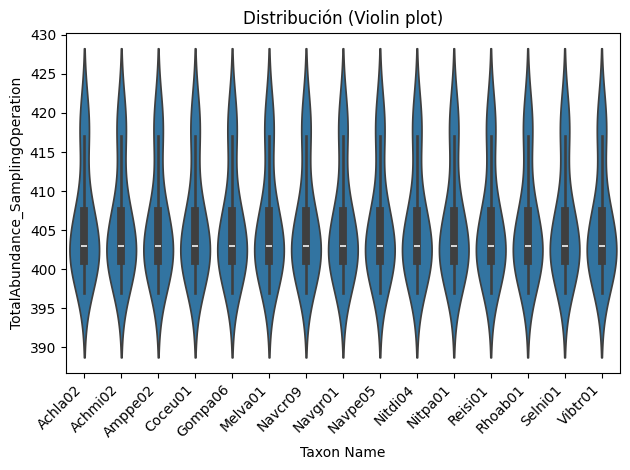

In [19]:
sns.violinplot(x='TaxonCode', y='TotalAbundance_SamplingOperation', inner='box', data=df_filtrado)
plt.title("Distribución (Violin plot)")
plt.ylabel("TotalAbundance_SamplingOperation")
plt.xlabel("Taxon Name")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **ANOVA**

In [20]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
mod= ols('TotalAbundance_SamplingOperation ~ TaxonCode', data=df_filtrado).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)

              df        sum_sq       mean_sq             F  PR(>F)
TaxonCode   14.0  1.932586e-23  1.380419e-24  2.730670e-26     1.0
Residual   210.0  1.061600e+04  5.055238e+01           NaN     NaN


La variable independiente TaxonCode no tiene un efecto significativo sobre la variable dependiente TotalAbundance_SamplingOperation.


Esto se observa porque el valor p (PR(>F)) es igual a 1.0, mucho mayor que 0.05.
Esto indica que no existen diferencias estadísticamente significativas en la abundancia total entre los distintos códigos de taxón analizados.


En resumen, la abundancia total no varía de manera importante según el código de taxón.

### **MANOVA** (ANOVA multifactorial)

ANOVA multifactorial con TaxonName y SamplingOperations_code como variables independientes, y TotalAbundance_SamplingOperation como variable dependiente

In [29]:
mod = ols('TotalAbundance_SamplingOperation ~ TaxonName + SamplingOperations_code', data=df_filtrado).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

                            df        sum_sq       mean_sq             F  \
TaxonName                 14.0  2.346986e-23  1.676419e-24  8.859557e+00   
SamplingOperations_code   14.0  1.061600e+04  7.582857e+02  4.007397e+27   
Residual                 196.0  3.708742e-23  1.892215e-25           NaN   

                               PR(>F)  
TaxonName                7.690689e-15  
SamplingOperations_code  0.000000e+00  
Residual                          NaN  


Tanto TaxonName como SamplingOperations_code tienen un efecto significativo sobre la variable TotalAbundance_SamplingOperation.


Esto se observa porque los valores p (PR(>F)) para ambas variables independientes son extremadamente bajos (prácticamente 0), mucho menores que 0.05.


Esto significa que los grupos definidos por TaxonName y SamplingOperations_code presentan diferencias importantes en la abundancia total, y ambos factores influyen de manera clara en los resultados.

## **Variable 3: Abundance PM**

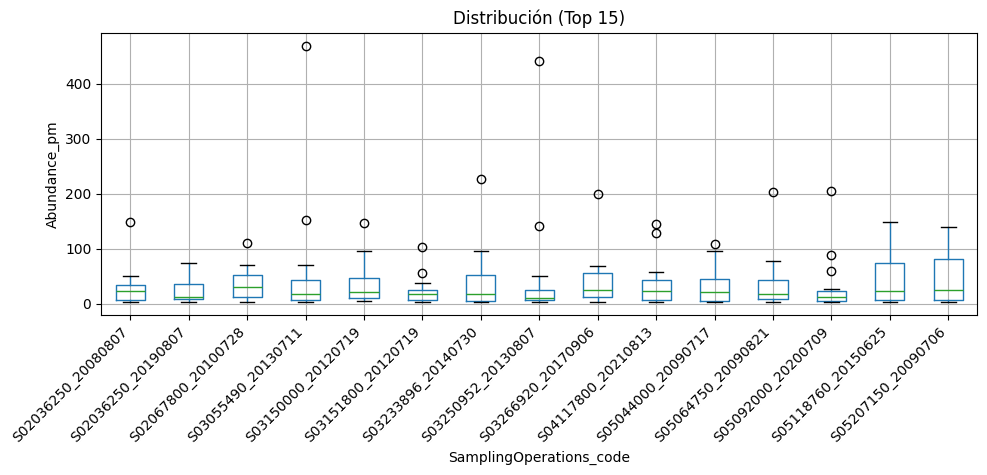

In [21]:
df_filtrado.boxplot("Abundance_pm", by="SamplingOperations_code", figsize=(10,5))
plt.xticks(rotation=45, ha='right')   
plt.title("Distribución (Top 15)")
plt.suptitle("") 
plt.xlabel("SamplingOperations_code")
plt.ylabel("Abundance_pm")
plt.tight_layout()
plt.show()

/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_33633/3744634483.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df_filtrado, x="SamplingOperations_code", y="Abundance_pm", ci=95)


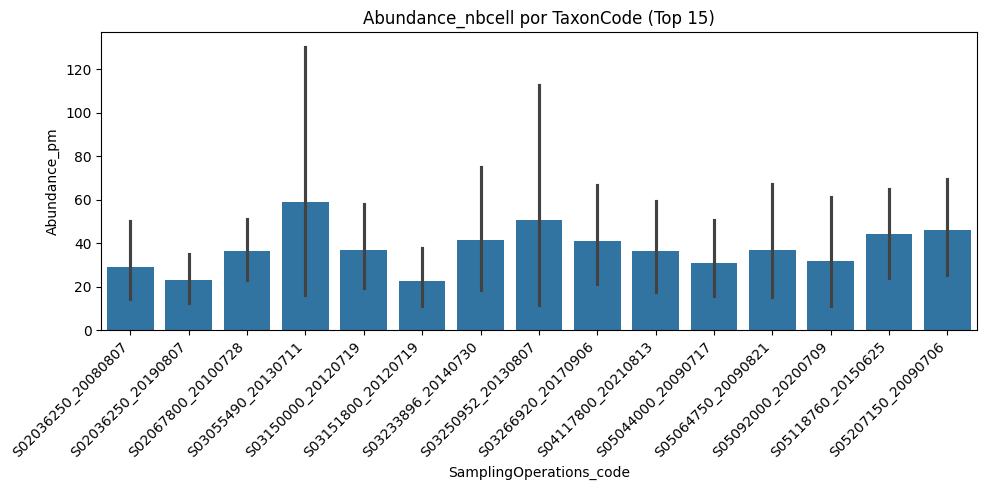

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_filtrado, x="SamplingOperations_code", y="Abundance_pm", ci=95)
plt.title("Abundance_nbcell por TaxonCode (Top 15)")
plt.xticks(rotation=45, ha='right')   
plt.ylabel("Abundance_pm")
plt.xlabel("SamplingOperations_code")
plt.tight_layout()                 
plt.show()

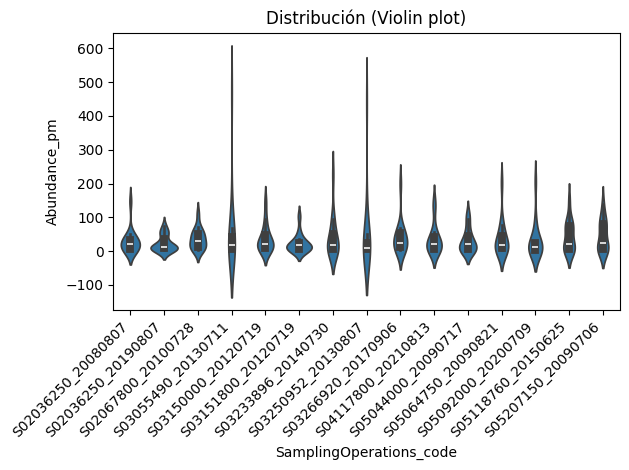

In [23]:
sns.violinplot(x='SamplingOperations_code', y='Abundance_pm', inner='box', data=df_filtrado)
plt.title("Distribución (Violin plot)")
plt.ylabel("Abundance_pm")
plt.xlabel("SamplingOperations_code")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **ANOVA**

In [24]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
mod= ols('Abundance_pm ~ SamplingOperations_code', data=df_filtrado).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)

                            df         sum_sq      mean_sq         F    PR(>F)
SamplingOperations_code   14.0   20383.384450  1455.956032  0.427042  0.964903
Residual                 210.0  715973.872142  3409.399391       NaN       NaN


La variable independiente SamplingOperations_code no tiene un efecto significativo sobre la variable dependiente Abundance_pm.


Esto se observa porque el valor p (PR(>F)) es muy alto (0.96), mucho mayor que 0.05.
Esto indica que no existen diferencias estadísticamente significativas en la abundancia pm entre los distintos códigos de operación de muestreo analizados.


En resumen, la abundancia pm no varía de manera importante según el código de operación de muestreo.

### **MANOVA** (ANOVA multifactorial)

ANOVA multifactorial con Date_SamplingOperation y CodeSite_SamplingOperations como variables independientes, y Abundance_pm como variable dependiente

In [30]:
mod = ols('Abundance_pm ~ Date_SamplingOperation + CodeSite_SamplingOperations', data=df_filtrado).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

                                df         sum_sq      mean_sq         F  \
Date_SamplingOperation        13.0   18816.807456  1447.446727  0.424546   
CodeSite_SamplingOperations   13.0   12923.579160   994.121474  0.291583   
Residual                     210.0  715973.872142  3409.399391       NaN   

                               PR(>F)  
Date_SamplingOperation       0.959831  
CodeSite_SamplingOperations  0.992643  
Residual                          NaN  


Los resultados muestran que ni la fecha de muestreo (Date_SamplingOperation) ni el sitio de muestreo (CodeSite_SamplingOperations) tienen un efecto significativo sobre Abundance_pm.


Esto se debe a que los valores p (PR(>F)) para ambas variables independientes son muy altos (0.96 y 0.99), mucho mayores que 0.05.


Esto indica que las diferencias en Abundance_pm entre los distintos sitios y fechas no son estadísticamente significativas en tu muestra.


En resumen, la abundancia pm no varía de manera importante según el sitio ni la fecha de muestreo.

### **Conclusión**

En este notebook se realizaron diversos análisis ANOVA y ANOVA multifactorial para evaluar el efecto de diferentes variables categóricas sobre la abundancia de diatomeas en distintas formas (celular, total y pm). 


Los resultados muestran que la variable TaxonName tiene un efecto significativo sobre la abundancia celular (Abundance_nbcell), indicando que la abundancia varía de manera importante entre los distintos taxones. Sin embargo, variables como CodeSite_SamplingOperations, Date_SamplingOperation y SamplingOperations_code no presentan efectos significativos sobre la abundancia celular ni sobre la abundancia pm, lo que sugiere que ni el sitio ni la fecha de muestreo ni el código de operación influyen de forma relevante en estos parámetros.
Para la abundancia total, TaxonCode tampoco mostró diferencias significativas, pero el análisis multifactorial reveló que tanto TaxonName como SamplingOperations_code sí afectan significativamente la abundancia total. 


En resumen, los factores biológicos relacionados con el taxón tienen mayor impacto en la abundancia de diatomeas que los factores espaciales o temporales del muestreo, según los datos analizados.